In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

Preço da opção de compra: 20.720636054714102


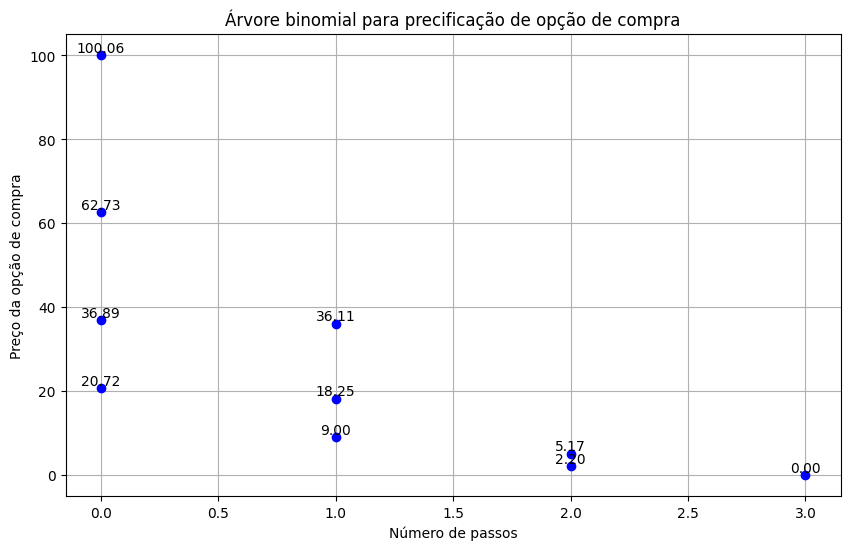

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def Arvore_binomial(S0, K, T, r, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    M_precos = np.zeros((n+1, n+1))
    
    for j in range(n+1):
        M_precos[n, j] = max(0, S0 * (u ** (n - j)) * (d ** j) - K)
    
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            M_precos[i, j] = np.exp(-r * dt) * (p * M_precos[i+1, j] + (1 - p) * M_precos[i+1, j+1])
    
    return M_precos[0, 0], M_precos

# Parâmetros
S0 = 41.67  # Preço atual do ativo
K = 23.81   # Preço de exercício da opção
T = 1       # Tempo até a expiração da opção (em anos)
r = 0.05    # Taxa de juros livre de risco
sigma = 0.6290  # Volatilidade anualizada
n = 3       # Número de passos na árvore binomial

# Calcular o preço da opção de compra e a árvore binomial
call, P = Arvore_binomial(S0, K, T, r, sigma, n)
print("Preço da opção de compra:", call)

# Plotar a árvore binomial
plt.figure(figsize=(10, 6))
for i in range(n+1):
    for j in range(i+1):
        plt.plot(j, P[i, j], 'bo')
        plt.text(j, P[i, j], f'{P[i, j]:.2f}', va='bottom', ha='center')

plt.xlabel('Número de passos')
plt.ylabel('Preço da opção de compra')
plt.title('Árvore binomial para precificação de opção de compra')
plt.grid(True)
plt.show()


